In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
import pandas as pd
from collections import Counter

In [3]:
data=pd.read_csv('tweet_counts.csv')

In [4]:
data.head()

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


In [5]:
data['count'].mean()

38.76923076923077

In [6]:
week=data['week']
tweets=data['count']
tweets.mean()

38.76923076923077

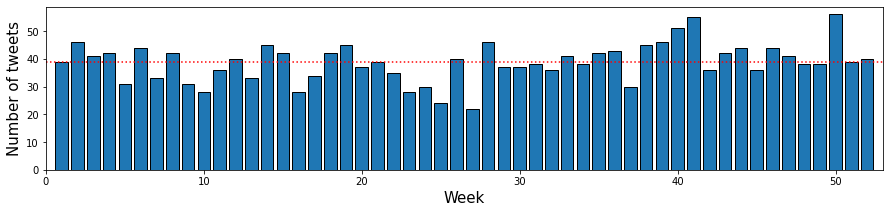

In [7]:
#b
plt.figure(figsize=(15,3))
plt.bar(week,tweets,edgecolor='black')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('Number of tweets',fontsize=15)
plt.hlines(data['count'].mean(),0,53,color='red',linestyles='dotted')

In [8]:
#d
Expoential=lambda λ,α: α*np.exp(-λ*α)
Expoential=np.vectorize(Expoential)

In [9]:
est_alpha=1/data['count'].mean()
est_alpha

0.025793650793650796

Text(0, 0.5, '$P(λ)$')

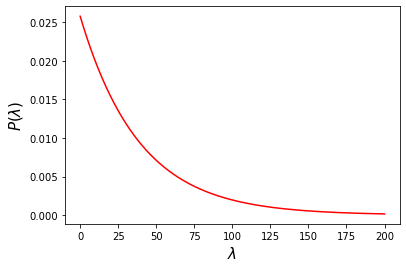

In [10]:
plt.plot(np.linspace(0,200,1000),Expoential(np.linspace(0,200,1000),est_alpha),c='r')
plt.xlabel('$λ$',fontsize=15)
plt.ylabel('$P(λ)$',fontsize=15)

In [12]:
#e
λ1_est=np.linspace(25,50,50)
λ2_est=np.linspace(25,50,50)
Ws_est=np.arange(1,53,1)

In [13]:
λ1_est_mesh,λ2_est_mesh,Ws_est_mesh=np.meshgrid(λ1_est,λ2_est,Ws_est)

$P(λ|data,Ws)=\frac{P(data|λ,Ws)*P(λ,Ws)}{P(data,Ws)}=\frac{P(data|λ,Ws)*P(λ|Ws)*P(Ws)}{P(data,Ws)}$

$P(Ws|data,λ)=\frac{P(data|λ,Ws)*P(λ,Ws)}{P(data,λ)}=\frac{P(data|λ,Ws)*P(λ|Ws)*P(Ws)}{P(data,λ)}$

In [14]:
Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

In [15]:
alpha=1/np.mean(tweets)
def Posterior_tweet(λ1,λ2,Ws):
    P=1
    for i in tweets[week<Ws]:
        P=P*np.prod(Poisson(i,λ1)*Expoential(λ1,alpha))
    for j in tweets[week>=Ws]:
        P=P*np.prod(Poisson(j,λ2)*Expoential(λ2,alpha))
    return (P)

In [16]:
Posterior_tweet=np.vectorize(Posterior_tweet)

In [17]:
#f
P3D=Posterior_tweet(λ1_est_mesh,λ2_est_mesh,Ws_est_mesh)

In [620]:
λ1_P=np.sum(P3D,axis=2)
λ2_P=np.sum(P3D,axis=2)
Ws_P=np.sum(P3D_,axis=0)

In [621]:
λ1_P=np.sum(λ1_P,axis=0)
λ2_P=np.sum(λ2_P,axis=1)
Ws_P=np.sum(Ws_P,axis=1)

In [622]:
λ1_Posterior=λ1_P/np.trapz(λ1_P,λ1_est)
λ2_Posterior=λ2_P/np.trapz(λ2_P,λ2_est)

In [623]:
λ1_mode=λ1_est[np.argmax(λ1_Posterior)]
λ2_mode=λ2_est[np.argmax(λ2_Posterior)]
Ws_mode=Ws_est[np.argmax(Ws_Posterior)]

In [624]:
λ1_mode

35.714285714285715

In [625]:
λ2_mode

41.326530612244895

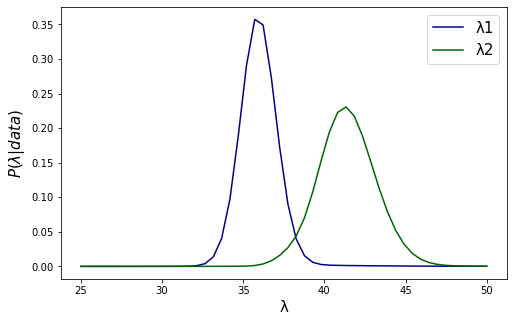

In [626]:
plt.figure(figsize=(8,5))
plt.plot(λ1_est,λ1_Posterior,color='darkblue',label="λ1")
plt.plot(λ2_est,λ2_Posterior,color='darkgreen',label="λ2")
plt.xlabel('λ',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.legend(fontsize=15)


Text(0, 0.5, '$P(Ws|data)$')

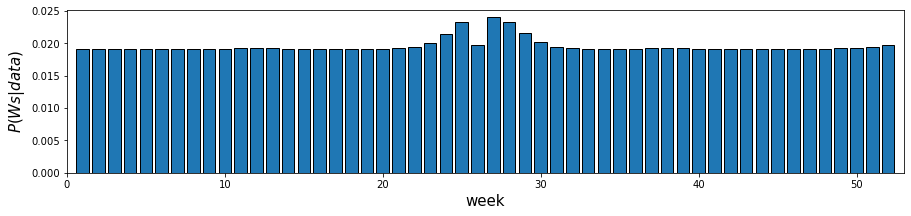

In [627]:
plt.figure(figsize=(15,3))
plt.bar(Ws_est,Ws_Posterior,edgecolor='black')
plt.xlim(0,53)
plt.xlabel('week',fontsize=15)
plt.ylabel('$P(Ws|data)$',fontsize=15)

In [628]:
#g
λ1_P2D=np.sum(P3D,axis=0)
λ2_P2D=np.sum(P3D,axis=1)

In [629]:
Diff=λ2_P2D-λ1_P2D
Diff=np.sum(Diff,axis=0)
Diff=Diff/np.trapz(Diff,Ws_est)

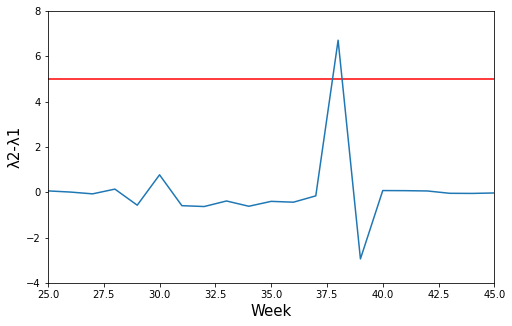

In [630]:
plt.figure(figsize=(8,5))
plt.plot(Ws_est,Diff)
plt.xlim(25,45)
plt.ylim(-4,8)
plt.xlabel('Week',fontsize=15)
plt.ylabel('λ2-λ1',fontsize=15)
plt.hlines(5,25,45,color='red')

In [18]:
P_joint=np.sum(P3D,axis=2)